---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS 

Discentes: 

- Pedro Henrique de Souza Fonsêca dos Santos
- Thiago Maia Souto


Título: **Resolução da Segunda Lista de Exercícios e Trabalhos**

---

#Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação. Procure definir para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada camada e o número de neurônios camada de saída.

## Importando as bibliotecas

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.10.0
    Uninstalling importlib-metadata-4.10.0:
      Successfully uninstalled importlib-metadata-4.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
import seaborn as sns
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

## Criando função geradora de modelos

Tendo em vista que o problema em questão é um problema de regressão, a acurácia padrão não é adequada para avaliar a performance do modelo, com isso foi implementada uma acurácia alternativa denominada **soft_acc**, a qual realiza um truncamento dos dados originais e em seguida os compara para verificar sua igualdade e por fim faz a média dos valores truncados.

In [ ]:
from typing import List
from keras import backend as K

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))


def neural_network(num_layers: int = 2, 
                   num_neurons: List[int] = [64,64],
                   activations: List[str] = ['relu', 'relu']) -> tf.keras.Model:

  model = keras.Sequential()

  for layer in range(num_layers):
    model.add(tfl.Dense(num_neurons[layer], activation = activations[layer]))

  model.add(tfl.Dense(1))

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = [soft_acc])

  
  return model

##a)
$f(x_1, x_2) = \left(\frac{cos(2\pi x_1)}{1 - (4x_1)^2} sen(\pi x_1)/\pi x_1\right)\left(\frac{cos(2\pi x_2)}{1 - (4x_2)^2} sen(\pi x_2)/\pi x_2\right)$

Com $-4\pi \leq x_1 \leq 4\pi$ e $-4\pi \leq x_2 \leq 4\pi$, além de $f(0,0) = 1$

### Amostrando as variáveis $x_1$ e $x_2$

Ambas as variáveis $x_1$ e $x_2$ estão sendo amostradas com 1000 valores linearmente espaçados dentro do intervalo de $-4\pi$ até $4\pi$.

In [ ]:
x1 = np.linspace(-4*np.pi, 4*np.pi, num = 1000 )
x2 = np.linspace(-4*np.pi, 4*np.pi,num = 1000 )

### Criando a grade

Visto que a função $f1$ depende de duas variáveis independentes $x1$ e $x2$ é necessário obter todas as combinações dos seus valores para especificar o domínio da função, o qual consiste em um plano, como mostrado na figura abaixo:

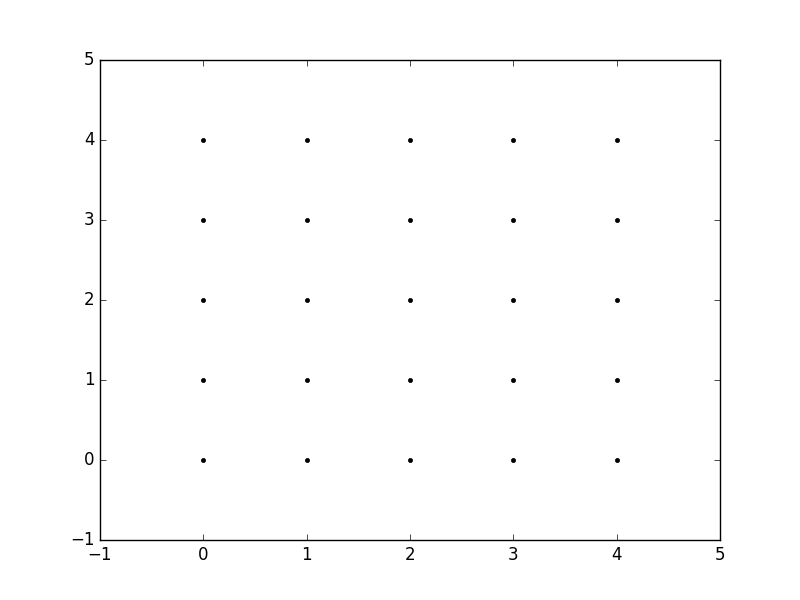

Para obter a grade basta usar a função **meshgrid**

In [ ]:
X1,X2 = np.meshgrid(x1,x2)

As matrizes $X1$ e $X2$ possuem os seguintes formatos

In [ ]:
print(f' Dimensão da matriz X1 = {X1.shape}')
print(f' Dimensão da matriz X2 = {X2.shape}')

 Dimensão da matriz X1 = (1000, 1000)
 Dimensão da matriz X2 = (1000, 1000)


### Definindo a função $f1$

In [ ]:
def f1(X,Y):
  return (np.cos(2*np.pi*X)/(1 - (4*X)**2)*(np.sin(np.pi*X)/np.pi*X))*(np.cos(2*np.pi*Y)/(1 - (4*Y)**2)*(np.sin(np.pi*Y)/np.pi*Y))


Z1 = f1(X1,X2)

As dimensões de $Z1$ são dadas por

In [ ]:
print(f' Dimensão da matriz Z1 = {Z1.shape}')

 Dimensão da matriz Z1 = (1000, 1000)


### Plotando a função $f1$

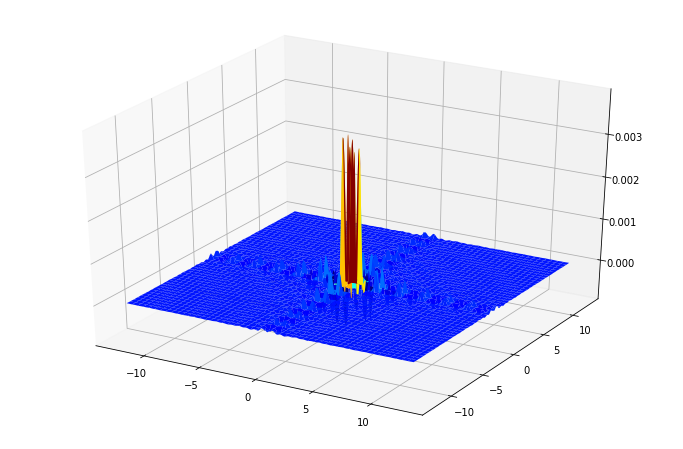

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_func(X1,X2,Z):
  fig = plt.figure(figsize = (12,8))
  ax = fig.gca(projection = '3d')
  ax.plot_surface(X1,X2,Z, cmap = cm.jet)
  plt.show()

plot_func(X1,X2,Z1)

### Criando conjunto de dados

Tendo em vista que uma entrada da rede neural consiste de uma amostra $(x,y)$ de um ponto dentro do domínio da função $f1$, o qual é determinado pelas matrizes $X1$ e $X2$, além do ponto $z_1 = f_1(x_1,x_2)$, o conjunto de dados a ser utilizado pode ser representado através da operação de *flatten* das matrizes $X1$, $X2$ e $Z1$ e da concatenação dos vetores colunas resultantes verticalmente, da seguinte forma 

In [ ]:
data = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1),Z1.reshape(-1,1)), axis = 1)

In [ ]:
data.shape

(1000000, 3)

Em seguida, é utilizada a função **train_test_split** da biblitoeca sklearn para dividir o conjunto de dados em conjunto de treino e de teste. Para o problema é utilizado uma separação de 70% dos dados para o treinamento e 30% dos dados para o teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.30, random_state=42)

In [ ]:
print(f' Dimensão da matriz X_train = {X_train.shape}')
print(f' Dimensão da matriz X_test = {X_test.shape}')
print(f' Dimensão da matriz Y_train = {Y_train.shape}')
print(f' Dimensão da matriz Y_test = { Y_test.shape}')

 Dimensão da matriz X_train = (700000, 2)
 Dimensão da matriz X_test = (300000, 2)
 Dimensão da matriz Y_train = (700000,)
 Dimensão da matriz Y_test = (300000,)


### Criando e treinando o modelo

Para o treinamento do modelo é utilizado um callback de **EarlyStopping** para encerrar o treinamento caso a função de custo atinja o valor mínimo de $0$ ou caso tenha valor constante após 5 épocas seguidas, além de definir um conjunto de validação com 20% do conjunto de treinamento por 100 épocas utilizando um batch de tamanho 500. Por fim, o modelo consiste de 2 camadas escondidas com 64 neurônios cada.

In [ ]:
# Criando modelo com hiperparametros defaults 
modelo1 = neural_network()

# Criando callback para EarlyStopping
monitor = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto') 

#Treinando o modelo a partir do dataset criado
h1 = modelo1.fit(X_train, Y_train, epochs = 100, callbacks = [monitor], batch_size = 500,validation_split=0.2 )

Epoch 1/100
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0112 - soft_acc: 0.9987 - val_loss: 0.0019 - val_soft_acc: 1.0000
Epoch 2/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.0013 - soft_acc: 1.0000 - val_loss: 4.9697e-04 - val_soft_acc: 1.0000
Epoch 3/100
1120/1120 [==============================] - 4s 4ms/step - loss: 3.6027e-04 - soft_acc: 1.0000 - val_loss: 1.8876e-04 - val_soft_acc: 1.0000
Epoch 4/100
1120/1120 [==============================] - 4s 4ms/step - loss: 7.1866e-05 - soft_acc: 1.0000 - val_loss: 2.9275e-05 - val_soft_acc: 1.0000
Epoch 5/100
1120/1120 [==============================] - 4s 4ms/step - loss: 7.6078e-06 - soft_acc: 1.0000 - val_loss: 2.8490e-07 - val_soft_acc: 1.0000
Epoch 6/100
1120/1120 [==============================] - 4s 4ms/step - loss: 2.5921e-07 - soft_acc: 1.0000 - val_loss: 2.7832e-07 - val_soft_acc: 1.0000
Epoch 7/100
1120/1120 [==============================] - 4s 4ms/step - loss: 2.5643e-07 - soft

### Obtendo gráficos de Acurácia e Erro durante o treinamento e validação

Definindo função para facilitar a plotagem dos dados

In [ ]:
import seaborn as sns

# Configurando tema de plotagem do seaborn
sns.set_theme()

def plot_logs(history: keras.callbacks.History , metric : str = 'loss') -> None:
  fig = plt.figure(figsize=(8,8))
  plt.plot(history.history[metric], label = metric)
  plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
  plt.legend()
  plt.ylabel(f'{metric}')
  plt.xlabel('epoch')
  plt.show()

Plotando a acurácia x época, utilizando a estratégia de truncamento dos dados para verificar a semelhança entre o valor original da função e o valor predito pela rede neural.

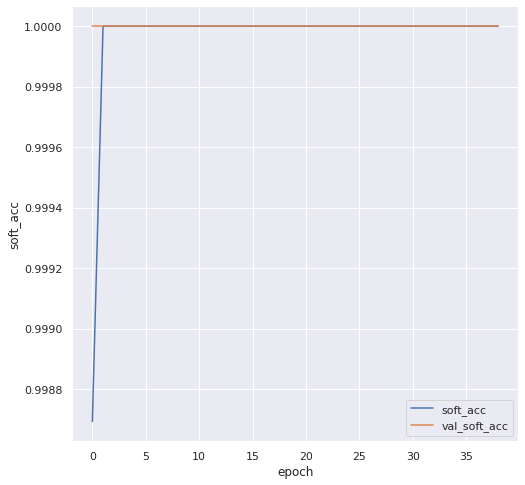

In [ ]:
plot_logs(h1,'soft_acc')

Plotando o erro médio quadrático **RMSE** x época

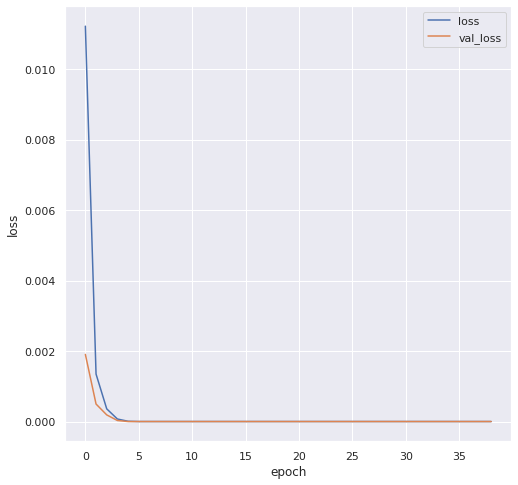

In [ ]:
plot_logs(h1, 'loss')

### Predizendo os valores da função com o modelo

Para predizer os valores da função $f1$ para cada ponto $(x_1,x_2)$ é necessário reamostrar os valores do domínio e em seguida aplicar o modelo para predizer o valor $\hat{y} ≈ f1(x_1,x_2)$ de cada ponto.

In [ ]:
x1 = np.linspace(-4*np.pi, 4*np.pi, num = 1000 )
x2 = np.linspace(-4*np.pi, 4*np.pi,num = 1000 )
X1,X2 = np.meshgrid(x1,x2)
data = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)), axis = 1)
predictions = modelo1.predict(data)

In [ ]:
predictions.shape

(1000000, 1)

Para plotar a superfície da função aproximada pelo modelo é necessário alterar o formato do vetor **predictions** para o formato $(1000,1000)$, o qual consiste no tamanho da malha necessária para plotagem da superfície

In [ ]:
predictions = predictions.reshape(1000,1000)

Plotando a superfície predita pelo modelo

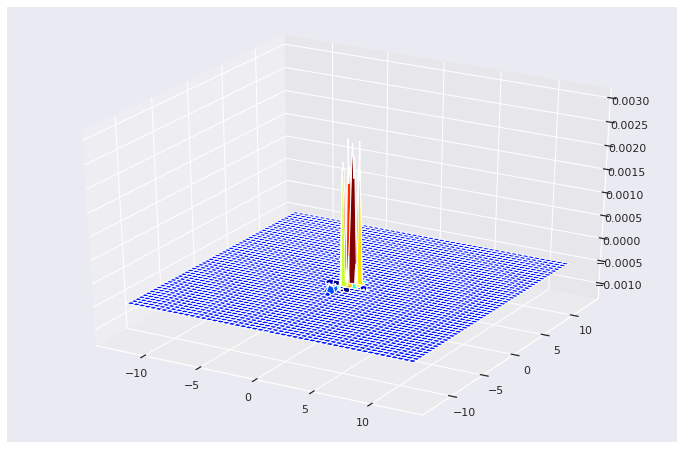

In [ ]:
plot_func(X1,X2,predictions)

A partir do gráfico acima produzido a partir das predições do modelo e o gráfico gerado pela função original, pode-se dizer que o modelo foi capaz de gerar uma boa estimativa da função $f1$ com uma quantidade pequena de épocas (39 épocas). Uma sugestão para aumentar a semelhança entre a função original e a predita é aumentar a capacidade da rede através do aumento do número de camadas escondidas ou do número de neurônios por camada ou até mesmo mudar o otimizador utilizado para o modelo ser capaz de aproximar as pequenas variações da função original.

##b)

$f(x) = x^2_1 + x^2_2 + 2x_1 x_2 cos(\pi x_1 x_2) + x_1 + x_2 - 1$

Com $|x_1| \leq 1$ e $|x_2| \leq 1$

### Amostrando as variáveis $x_1$ e $x_2$

Ambas as variáveis $x_1$ e $x_2$ estão sendo amostradas com 1000 valores linearmente espaçados dentro do intervalo de $0$ até $1$.

In [ ]:
x1 = np.linspace(0, 1, num = 1000 )
x2 = np.linspace(0, 1, num = 1000 )

### Criando a grade

In [ ]:
X1,X2 = np.meshgrid(x1,x2)

As matrizes $X1$ e $X2$ possuem os seguintes formatos

In [ ]:
print(f' Dimensão da matriz X1 = {X1.shape}')
print(f' Dimensão da matriz X2 = {X2.shape}')

 Dimensão da matriz X1 = (1000, 1000)
 Dimensão da matriz X2 = (1000, 1000)


### Definindo e plotando a função $f2$

Definindo a função $f2$

In [ ]:
def f2(X,Y):
  return X**2 + Y**2 + 2*X*Y*np.cos(np.pi*X*Y) + X + Y -1

Z2 = f2(X1,X2)

Plotando a função $f2$

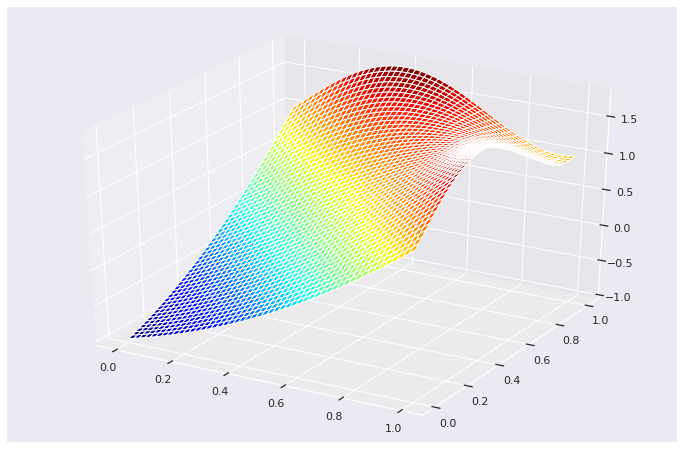

In [ ]:
plot_func(X1,X2,Z2)

### Criando conjunto de dados

Seguindo o mesmo procedimento do exemplo anterior

In [ ]:
data = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1),Z2.reshape(-1,1)), axis = 1)

Para o problema é utilizado uma separação de 70% dos dados para o treinamento e 30% dos dados para o teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.30, random_state=42)

In [ ]:
print(f' Dimensão da matriz X_train = {X_train.shape}')
print(f' Dimensão da matriz X_test = {X_test.shape}')
print(f' Dimensão da matriz Y_train = {Y_train.shape}')
print(f' Dimensão da matriz Y_test = { Y_test.shape}')

 Dimensão da matriz X_train = (700000, 2)
 Dimensão da matriz X_test = (300000, 2)
 Dimensão da matriz Y_train = (700000,)
 Dimensão da matriz Y_test = (300000,)


### Criando e treinando o modelo

Para o treinamento do modelo é utilizado um callback de **EarlyStopping** para encerrar o treinamento caso a função de custo atinja o valor mínimo de $0$ ou caso tenha valor constante após 5 épocas seguidas, além de definir um conjunto de validação com 20% do conjunto de treinamento por 100 épocas utilizando um batch de tamanho 500. Por fim, o modelo consiste de 2 camadas escondidas com 64 neurônios cada.

In [ ]:
# Criando modelo com hiperparametros defaults 
modelo2 = neural_network()

# Criando callback para EarlyStopping
monitor = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto') 

#Treinando o modelo a partir do dataset criado
h2 = modelo2.fit(X_train, Y_train, epochs = 100, callbacks = [monitor], batch_size = 500,validation_split=0.2 )

Epoch 1/100
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0243 - soft_acc: 0.9111 - val_loss: 0.0013 - val_soft_acc: 0.9612
Epoch 2/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.0013 - soft_acc: 0.9621 - val_loss: 0.0012 - val_soft_acc: 0.9599
Epoch 3/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.0011 - soft_acc: 0.9644 - val_loss: 0.0011 - val_soft_acc: 0.9606
Epoch 4/100
1120/1120 [==============================] - 4s 4ms/step - loss: 9.3320e-04 - soft_acc: 0.9665 - val_loss: 7.6680e-04 - val_soft_acc: 0.9664
Epoch 5/100
1120/1120 [==============================] - 4s 4ms/step - loss: 8.2717e-04 - soft_acc: 0.9691 - val_loss: 9.0686e-04 - val_soft_acc: 0.9654
Epoch 6/100
1120/1120 [==============================] - 4s 4ms/step - loss: 7.4041e-04 - soft_acc: 0.9704 - val_loss: 7.4795e-04 - val_soft_acc: 0.9676
Epoch 7/100
1120/1120 [==============================] - 4s 4ms/step - loss: 6.7960e-04 - soft_acc: 0.9714

### Obtendo gráficos de Acurácia e Erro durante o treinamento e validação

Plotando a acurácia x época, utilizando a estratégia de truncamento dos dados para verificar a semelhança entre o valor original da função e o valor predito pela rede neural.

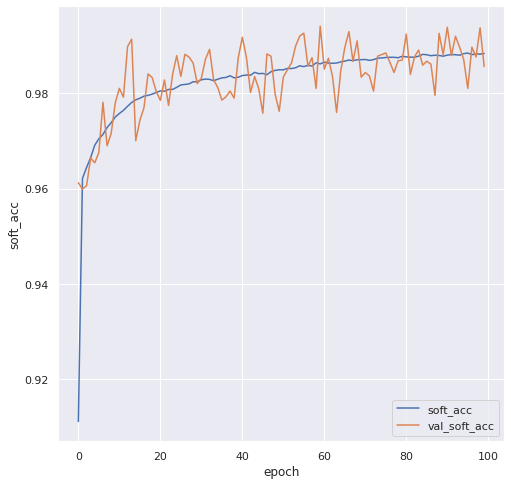

In [ ]:
plot_logs(h2,'soft_acc')

Plotando o erro médio quadrático **RMSE** x época

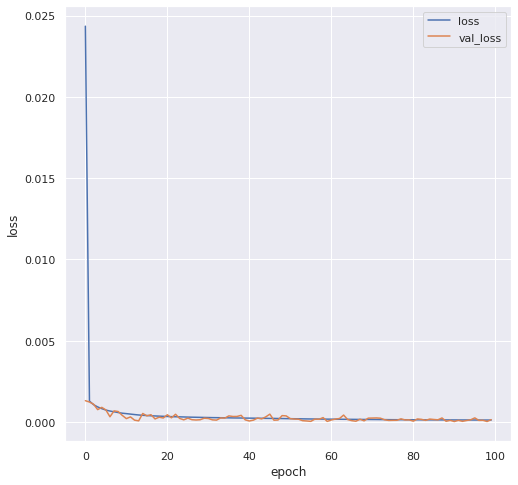

In [ ]:
plot_logs(h2,'loss')

### Predizendo os valores da função com o modelo

Para predizer os valores da função $f2$ para cada ponto $(x_1,x_2)$ é necessário reamostrar os valores do domínio e em seguida aplicar o modelo para predizer o valor $\hat{y} ≈ f2(x_1,x_2)$ de cada ponto.

In [ ]:
x1 = np.linspace(0, 1, num = 1000 )
x2 = np.linspace(0, 1, num = 1000 )
X1,X2 = np.meshgrid(x1,x2)
data = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)), axis = 1)
predictions = modelo2.predict(data)

In [ ]:
predictions.shape

(1000000, 1)

Para plotar a superfície da função aproximada pelo modelo é necessário alterar o formato do vetor **predictions** para o formato $(1000,1000)$, o qual consiste no tamanho da malha necessária para plotagem da superfície

In [ ]:
predictions = predictions.reshape(1000,1000)

Plotando a superfície predita pelo modelo

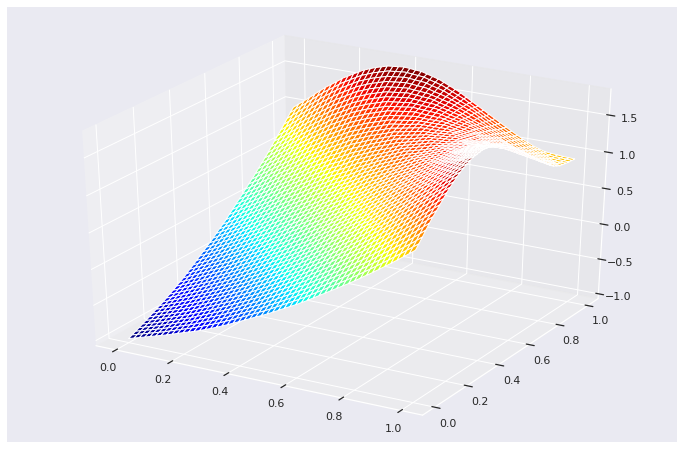

In [ ]:
plot_func(X1,X2,predictions)

A partir do gráfico acima produzido a partir das predições do modelo e o gráfico gerado pela função original, pode-se dizer que o modelo foi capaz de gerar uma boa estimativa da função $f2$, no entanto levou uma quantidade maior de épocas que a função anterior. Além disso, através da plotagem das curvas de acurácia foi possível notar que mesmo tendo uma grande variação da acurácia de validação em relação a de treinamento, o modelo foi capaz de aproximar a função de forma muito boa. Uma explicação para esse fenomeno pode ter sido a definição de acurácia utilizada que pode não ser a mais adequada para o problema, além do comportamento da própria função estimada.

#Questão 2

Considere o problema de classificação de padrões constituído neste caso por duas espirais intercaladas. A espiral 1 sendo a classe1 e a espiral 2 sendo a classe 2. Gere os exemplos de treinamento usando as seguintes equações: 

para espiral 1 $x = \frac{\theta}{4} cos(\theta)$, $y = \frac{\theta}{4} sen(\theta)$ e $\theta \geq 0$

para espiral 2 $x = (\frac{\theta}{4} + 0.8) cos\theta$, $y = (\frac{\theta}{4} + 0.8) sen\theta$ e $\theta \geq 0$

fazendo $\theta$ assumir valores igualmente espaçados entre 0 e 20 radianos. Solucione este problema considerando:

## Criando gerador de espirais

In [ ]:
def gerador_espirais(label: str = '0', noise : bool = False)-> pd.DataFrame:
  #Amostrando o parametro theta por 1000 amostras entre 0 e 20 radianos
  theta = np.linspace(0,20, 1000)
  if label == '0':
    x = theta/4*np.cos(theta) + noise*0.25*np.random.randn(1000)
    y = theta/4*np.sin(theta) + noise*0.25*np.random.randn(1000)
  elif label == '1':
    x = (theta/4 + 0.8)*np.cos(theta) + noise*0.25*np.random.randn(1000)
    y = (theta/4 + 0.8)*np.sin(theta) + noise*0.25*np.random.randn(1000)
  else:
    x = np.zeros(1000)
    y = np.zeros(1000)
    
  
  X = np.vstack((x,y)).T
  df = pd.DataFrame(X, columns=['x', 'y'])
  df['label'] = [int(label)]*df.shape[0]

  return df

## Criando os espirais 1 e 2

In [ ]:
# Criando espiral 1
df1 = gerador_espirais(label='0')
# Criando espiral 2
df2 = gerador_espirais(label='1')
# Juntando os espirais uma abaixo da outra
df = pd.concat([df1,df2], axis = 0)

## Plotando as espirais

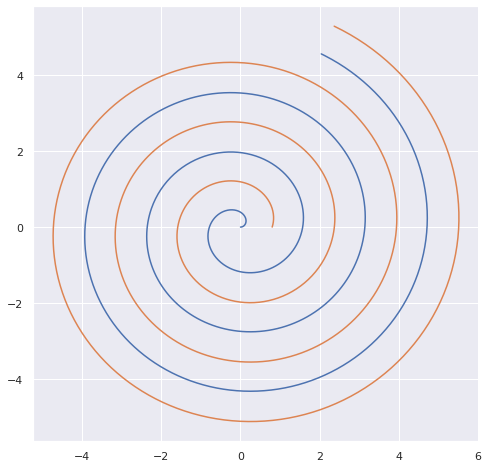

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(df1.x,df1.y,df2.x,df2.y)
plt.show()

## Separando o dataset em conjuntos de treino e teste

Para o problema é utilizado uma separação de 70% dos dados para o treinamento e 30% dos dados para o teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.30, random_state=42)

In [ ]:
print(f'Dimensão X_train = {X_train.shape}')
print(f'Dimensão Y_train = {Y_train.shape}')
print(f'Dimensão X_test = {X_test.shape}')
print(f'Dimensão Y_test = {Y_test.shape}')

Dimensão X_train = (1400, 2)
Dimensão Y_train = (1400,)
Dimensão X_test = (600, 2)
Dimensão Y_test = (600,)


###a)
Um rede perceptron de múltiplas camadas

### Criando geradora de modelos de redes neurais

Como o problema da Questão 2 trata-se de um problema de classificação binária, então na última camada utiliza-se apenas um único neurônio com função de ativação dada pela função **sigmoid**, de modo que o valor da sáida é a probabibilidade de determinado ponto pertencer a classe 0 ou 1. Além disso, por se tratar de uma classificação binária, a função de custo utilizada trata-se da **binary_crossentropy** e o otimizador utilizado é o **adam**.

In [ ]:
from typing import Dict, Iterable, Any

def get_clf_model(hidden_layer_sizes: Iterable[int], meta: Dict[str, Any], compile_kwargs: Dict[str, Any]):
    model = keras.Sequential()
    inp = keras.layers.Input(shape=(meta["n_features_in_"]))
    model.add(inp)
    for hidden_layer_size in hidden_layer_sizes:
        layer = keras.layers.Dense(hidden_layer_size, activation="relu")
        model.add(layer)
    if meta["target_type_"] == "binary":
        n_output_units = 1
        output_activation = "sigmoid"
        loss = "binary_crossentropy"
    elif meta["target_type_"] == "multiclass":
        n_output_units = meta["n_classes_"]
        output_activation = "softmax"
        loss = "sparse_categorical_crossentropy"
    else:
        raise NotImplementedError(f"Unsupported task type: {meta['target_type_']}")
    out = keras.layers.Dense(n_output_units, activation=output_activation)
    model.add(out)
    model.compile(loss=loss, optimizer=compile_kwargs["optimizer"])
    return model


### Criando o modelo da rede neural

Para o treinamento do modelo foi definido um conjunto de validação com 20% do conjunto de treinamento por 50 épocas utilizando um batch de tamanho 32. Por fim, o modelo consiste de 3 camadas escondidas com 128, 64, 64 neurônios respectivamente e com função de ativação **relu**.

In [ ]:
modelo1 = KerasClassifier(
    model=get_clf_model,
    hidden_layer_sizes=(128,64,64 ),
    optimizer="adam",
    optimizer__learning_rate=0.01,
    epochs=50,
    meta = {"target_type_": 'binary'},
    verbose=0
)

modelo1.fit(X_train, Y_train)

KerasClassifier(
	model=<function get_clf_model at 0x7fecc0a15c20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	hidden_layer_sizes=(128, 64, 64)
	optimizer__learning_rate=0.01
	meta={'target_type_': 'binary'}
	class_weight=None
)

Obtendo as predições do modelo

In [ ]:
y1_pred = modelo1.predict(X_test)

### Matriz de confusão para conjunto de testes

Plotando a matriz de confusão

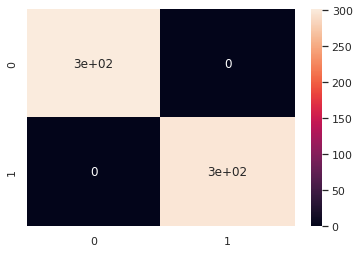

In [ ]:
c1 = confusion_matrix(Y_test,y1_pred)
sns.heatmap(c1, annot=True)
plt.show()

### Acurácia do modelo de Rede Neural

In [ ]:
accuracy_score(Y_test, y1_pred )

1.0

Como pode ser visto a partir da matriz de confusão o modelo criado a partir da rede neural clasificou corretamenta todas as amostras do conjunto de testes, por isso obteve acurácia de 100%.

### Região de decisão da Rede Neural

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


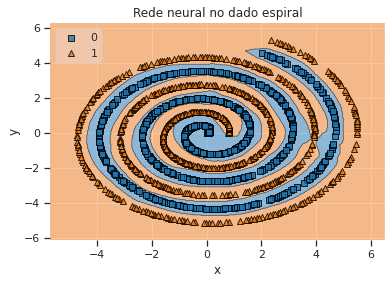

In [ ]:
plot_decision_regions(X_train.to_numpy(), Y_train.to_numpy(), clf=modelo1, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Rede neural no dado espiral')
plt.show()

###b)
Uma máquina de vetor de suporte (SVM)

### Criando Modelo da SVM

Tendo em vista a natureza espiral dos dados, optou-se por utilizar uma SVM com kernel gaussuiano **radial basis function** com parâmetro **gamma** unitário

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

modelo2 = SVC(kernel='rbf', gamma = 1)
modelo2.fit(X_train, Y_train)

SVC(gamma=1)

Obtendo as predições do modelo

In [ ]:
y2_pred = modelo2.predict(X_test)

### Matriz de confusão para conjunto de testes

Plotando a matriz de confusão para as predições do modelo no conjunto de testes

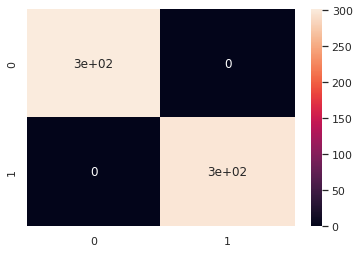

In [ ]:
c2 = confusion_matrix(Y_test,y2_pred)
sns.heatmap(c2, annot=True)
plt.show()

### Acurácia do modelo SVM

In [ ]:
accuracy_score(Y_test, y2_pred )

1.0

Como pode ser visto acima, o modelo SVM utilizando os hiperparâmetros definidos anteriormente foi capaz de prever corretamente todas as classes do conjunto de testes, obtendo uma acurácia de 100%.

### Região de decisão da SVM

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


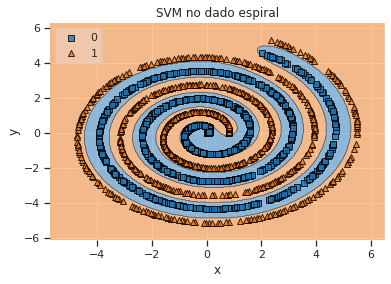

In [ ]:
plot_decision_regions(X_train.to_numpy(), Y_train.to_numpy(), clf=modelo2, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM no dado espiral')
plt.show()

###c)
Um comitê de máquinas formado por uma rede perceptron, uma SVM e uma KNN

### Criando o modelo do classificador KNN

Para o modelo KNN foi utilizado como hiperparâmetro a quantidade de vizinhos igual a 2.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo3 = KNeighborsClassifier(n_neighbors = 2)
modelo3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

Predizendo os valores do conjunto de teste

In [ ]:
y3_pred = modelo3.predict(X_test)

### Matriz de confusão para o conjunto de testes

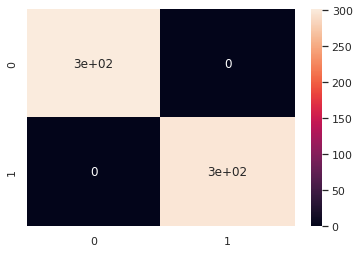

In [ ]:
c3 = confusion_matrix(Y_test,y3_pred)
sns.heatmap(c3, annot=True)
plt.show()

### Acurácia do modelo KNN

In [ ]:
accuracy_score(Y_test, y3_pred )

1.0

Como pode ser visto acima, o modelo KNN, assim como o SVM e a rede neural foi capaz de prever corretamente todas as classes do conjunto de testes, obtendo uma acurácia de 100%.

### Região de decisão do KNN

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


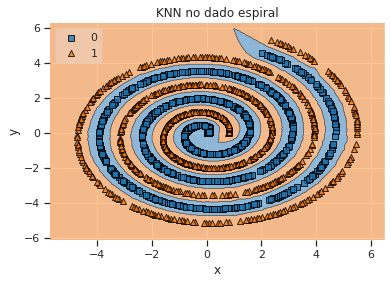

In [ ]:
plot_decision_regions(X_train.to_numpy(), Y_train.to_numpy(), clf=modelo3, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('KNN no dado espiral')
plt.show()

### Comitê

Tendo em vista que todos os modelos utilizados alcançaram uma acurácia de 100%, não faz sentido a criação de um **ensemble** para a melhora da acurácia, por esse motivo optou-se por adicionar ruído ao conjunto de dados de espirais de forma a dificultar a predição correta dos modelos, justificando a criação de um **ensemble**

### Criando espirais ruidosas

In [ ]:
# Criando espiral 1
df1 = gerador_espirais(label='0', noise = True)
# Criando espiral 2
df2 = gerador_espirais(label='1', noise = True)
# Juntando os espirais uma abaixo da outra
df_noise = pd.concat([df1,df2], axis = 0)

Dividindo o dataset em amostras e labels

In [ ]:
noise_samples, noise_labels = df_noise.iloc[:,:-1], df_noise.iloc[:,-1].astype(str)

Plotando as espirais com ruido

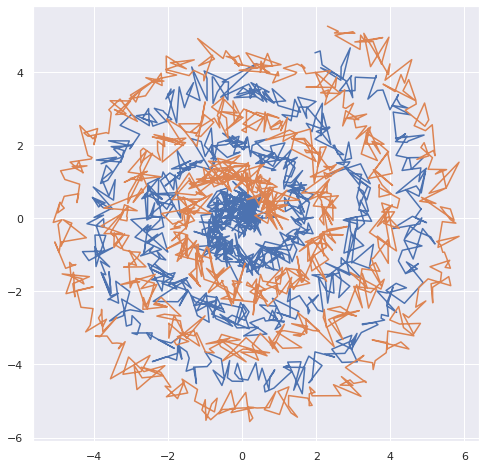

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(df1.x,df1.y,df2.x,df2.y)
plt.show()

### Avaliando o modelo de Rede Neural usando dataset com ruido

In [ ]:
y1_pred_noise = modelo1.predict(noise_samples)

Obtendo matriz de confusao para a rede neural

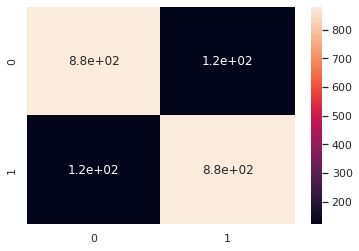

In [ ]:
c4 = confusion_matrix(noise_labels.astype(int),y1_pred_noise)
sns.heatmap(c4, annot=True)
plt.show()

Obtendo a acurácia para o modelo de Rede Neural

In [ ]:
accuracy_score(noise_labels.astype(int),np.rint(y1_pred_noise))

0.856

Como pode ser visto a partir da matriz de confusão acima, com o acréscimo do ruído ao conjunto de dados o modelo começou a apresentar dificuldade para classificar corretamente os dados, ocasionando uma queda na acurácia de 100% para cerca de 85.6%

### Avaliando o modelo SVM usando dataset com ruido

In [ ]:
y2_pred_noise = modelo2.predict(noise_samples)

Obtendo matriz de confusao para a SVM

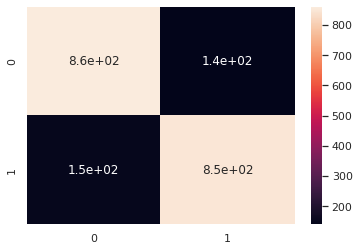

In [ ]:
c5 = confusion_matrix(noise_labels.astype(int),y2_pred_noise)
sns.heatmap(c5, annot=True)
plt.show()

Obtendo a acurácia para o modelo de SVM

In [ ]:
accuracy_score(noise_labels.astype(int), y2_pred_noise )

0.8555

Como pode ser visto a partir da matriz de confusão acima, com o acréscimo do ruído ao conjunto de dados o modelo começou a apresentar dificuldade para classificar corretamente os dados, ocasionando uma queda na acurácia de 100% para cerca de 85.55%

### Avaliando o modelo KNN usando dataset com ruido

In [ ]:
y3_pred_noise = modelo3.predict(noise_samples)

Obtendo matriz de confusao para o KNN

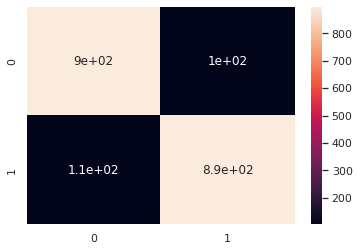

In [ ]:
c6 = confusion_matrix(noise_labels.astype(int),y3_pred_noise)
sns.heatmap(c6, annot=True)
plt.show()

Obtendo a acurácia para o modelo de KNN

In [ ]:
accuracy_score(noise_labels.astype(int), y3_pred_noise )

0.8945

Assim como ocorreu para o modelo SVM, com o acréscimo do ruído ao conjunto de dados o modelo KNN teve mais dificuldade para classificar corretamente o conjunto de dados, tendo uma queda de acurácia de 100% para cerca de 89.45%.

### Criando o Comitê

Tendo em vista que foram criados 3 modelos usando algoritmos bastante distintos utilizando o mesmo conjunto de dados, optou-se pela utilização da técnica **voting classifier** para realização do **ensemble** dos 3 modelos.

In [ ]:
from sklearn.ensemble import VotingClassifier

modelo4 = VotingClassifier(estimators = [('nn', modelo1), ('svm', modelo2), ('knn', modelo3)],
                           voting = 'hard')

modelo4.fit(X_train, Y_train)

VotingClassifier(estimators=[('nn',
                              KerasClassifier(epochs=50, hidden_layer_sizes=(128, 64, 64), meta={'target_type_': 'binary'}, model=<function get_clf_model at 0x7fecc0a15c20>, optimizer='adam', optimizer__learning_rate=0.01, verbose=0)),
                             ('svm', SVC(gamma=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=2))])

### Avaliando o Ensemble

Predizendo as classes do conjunto de dados ruidoso

In [ ]:
y4_pred_noise = modelo4.predict(noise_samples)

Plotando a matriz de confusão do **Ensemble**

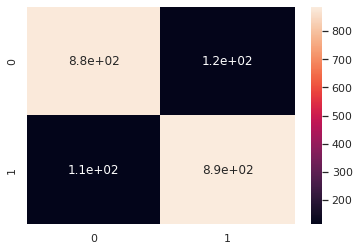

In [ ]:
c7 = confusion_matrix(noise_labels.astype(int),y4_pred_noise)
sns.heatmap(c7, annot=True)
plt.show()

Obtendo acurácia do **Ensemble**

In [ ]:
accuracy_score(noise_labels.astype(int), y4_pred_noise )

0.883

Analisando a acurácia e matriz de confusão do ensemble em comparação a cada modelo separadamente, nota-se que apesar do KNN ter apresentado uma maior acurácia separadamente, o **ensemble** obteve um desempenho médio superior aos demais modelos.

#Questão 3

Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma matriz de confusão.

Obs. Pesquise e utilize uma rede convolutiva já treinada

###Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


###Carregando dados

170508288/170498071 [==============================] - 2s 0us/step


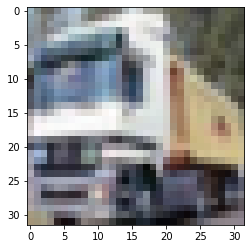

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

img = plt.imshow(trainX[1])

### Convertendo para dados categóricos

In [ ]:
from tensorflow.keras.utils import to_categorical

trainY_one_hot = to_categorical(trainY)
testY_one_hot = to_categorical(testY)

###Inicializando a rede neural MobileNet

Para classificar as imagens do Cifar-10, iremos utilizar a rede MobileNet por transfer learning. Ela será nossa rede inicial.

In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3), classes=trainY.shape[1])

17235968/17225924 [==============================] - 0s 0us/step


###Criando a rede neural

In [ ]:
#Adicionando mais layers

model = Sequential()

#Utilizando a MobileNet como a rede inicial
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())

#Adicionando alguns denses e dropouts
model.add(Dense(512,activation=('relu'))) 

model.add(Dense(256,activation=('relu'))) 

model.add(Dropout(.3))

model.add(Dense(128,activation=('relu')))

model.add(Dropout(.2))

model.add(Dense(10,activation=('softmax')))

Agora veremos um resumo do modelo

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 1, 1, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

Agora compilaremos o modelo utilizando o calculo da perda como entropia cruzada categórica, já que transformamos os dados em categóricos no início, otimizador adam e precisão como métrica.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

Podemos então treinar nossa rede, utilizando 20 épocas.

In [ ]:
hist = model.fit(trainX, trainY_one_hot, batch_size = 100, epochs = 20, 
                 validation_split = 0.1)

Epoch 1/20
450/450 [==============================] - 30s 38ms/step - loss: 1.3293 - accuracy: 0.5518 - val_loss: 0.8577 - val_accuracy: 0.7148
Epoch 2/20
450/450 [==============================] - 17s 38ms/step - loss: 0.8335 - accuracy: 0.7375 - val_loss: 0.7593 - val_accuracy: 0.7476
Epoch 3/20
450/450 [==============================] - 17s 38ms/step - loss: 0.7037 - accuracy: 0.7824 - val_loss: 0.7486 - val_accuracy: 0.7542
Epoch 4/20
450/450 [==============================] - 16s 36ms/step - loss: 0.6157 - accuracy: 0.8085 - val_loss: 0.6812 - val_accuracy: 0.7904
Epoch 5/20
450/450 [==============================] - 17s 38ms/step - loss: 0.5608 - accuracy: 0.8259 - val_loss: 0.7457 - val_accuracy: 0.7582
Epoch 6/20
450/450 [==============================] - 17s 38ms/step - loss: 0.5111 - accuracy: 0.8423 - val_loss: 0.7299 - val_accuracy: 0.7812
Epoch 7/20
450/450 [==============================] - 16s 36ms/step - loss: 0.4742 - accuracy: 0.8535 - val_loss: 0.6019 - val_accuracy:

Testando o modelo

In [ ]:
model.evaluate(testX, testY_one_hot)[1]


313/313 [==============================] - 4s 13ms/step - loss: 0.7076 - accuracy: 0.8094


0.8094000220298767

In [ ]:
yhat = model.predict(testX)
print(yhat[0])

predicted_classes = np.argmax(yhat, axis=1)
print(predicted_classes[0])

[1.3421541e-04 1.6718484e-04 1.1210947e-03 8.4539700e-01 1.7590950e-03
 1.4819209e-01 2.2026361e-03 5.1539182e-04 1.2594664e-05 4.9864606e-04]
3


###Visualizando a precisão do modelo

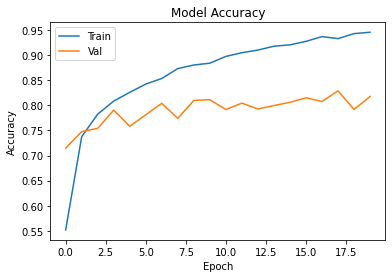

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')

###Matriz de confusão

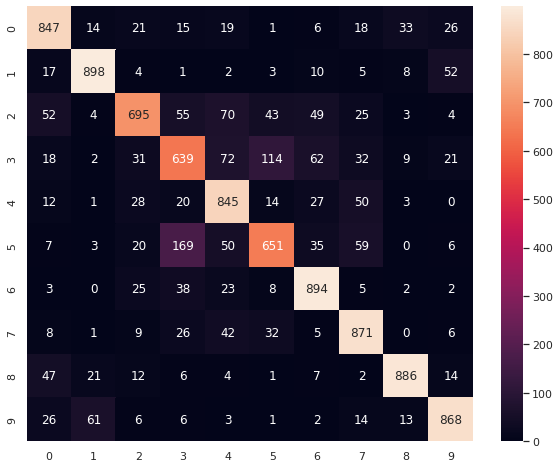

In [ ]:
import seaborn as sns
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(testY, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

#Questão 4

Considere quatro distribuições gaussianas, C1, C2, C3, e C4, em um espaço de entrada de dimensionalidade igual a oito, isto é $\textbf{x} = (x_1, x_2, ..., x_8)^t$ Todas as nuvens de dados formadas têm variâncias unitária, mas centros ou vetores média são diferentes e dados por $\textbf{m}_1 = (0,0,0,0,0,0,0,0)^t$, $\textbf{m}_2 = (4,0,0,0,0,0,0,0)^t$, $\textbf{m}_3 = (0,0,0,4,0,0,0,0^t)$, $\textbf{m}_4 = (0,0,0,0,0,0,0,4)^t$.Utilize uma rede de autoeconder para visualizar os dados em duas dimensões. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2. Esboce os dados neste novo espaço.


### Criando o conjunto de dados

In [ ]:
# Dimensão dos dados
dim = 8
# Número de pontos a ser amostrado
N = 100
# Matriz de Covariância para as distribuições
cov = np.identity(dim)
# Definição dos vetores média de cada distribuição
m1 = np.array([0,0,0,0,0,0,0,0])
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])
# Concatenando os vetores media em uma lista
m = [m2, m3, m4]
# Criando a primeira distribuição
c1 = np.random.multivariate_normal(m1, cov, N)
# Criando um dataframe para armazenar as distribuições
df = pd.DataFrame(c1, columns = [f'x{i+1}' for i in range(8)]) 
# Criando uma lista para armazenar as demais distribuições
dists = []
# Criando e concatenando cada distribuição 
for i in range(len(m)):
  dists.append(np.random.multivariate_normal(m[i], cov, N))
  df = pd.concat([df, pd.DataFrame(dists[i], columns = [f'x{i+1}' for i in range(8)])], axis = 0, ignore_index= True)
# Criando coluna label para cada distribuição
df['label'] = [f'{j+1}' for j in range(4) for k in range(N)]

### Separando o dataset em conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,:-1], test_size=0.30, random_state=42)

Normalizando os valores nos conjuntos de teste e treino

In [ ]:
X_train = (X_train - np.mean(X_train, axis= 0))/ np.std(X_train, axis = 0)
X_test = (X_test - np.mean(X_test, axis= 0))/ np.std(X_test, axis = 0)

### Criando o modelo do autoencoder

Criação do autoencoder com definição dos hiperparâmetros

In [ ]:
encoder = keras.models.Sequential([tfl.Dense(2, input_shape = [8])])

decoder = keras.models.Sequential([tfl.Dense(8, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder,decoder])

optimizer = keras.optimizers.SGD(lr=0.1)

autoencoder.compile(loss = 'mse', optimizer=optimizer,  metrics = ['mae'])

h = autoencoder.fit(X_train, X_train, epochs = 200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
9/9 [==============================] - 0s 3ms/step - loss: 1.4377 - mae: 0.9485
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.0242 - mae: 0.8131
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.9039 - mae: 0.7622
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.8374 - mae: 0.7324
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7924 - mae: 0.7107
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7613 - mae: 0.6941
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7414 - mae: 0.6834
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7295 - mae: 0.6773
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7227 - mae: 0.6740
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7185 - mae: 0.6719
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7162 

Predizendo os valores de todos os pontos de todas as distribuições através do encoder

In [ ]:
preds = encoder.predict(df.iloc[:,:-1])

### Plotando os dados com dimensionalidade reduzida

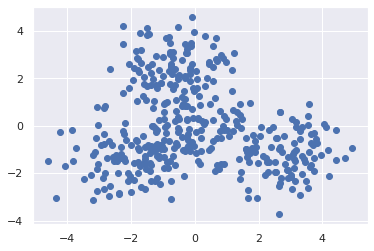

In [ ]:
plt.scatter(preds[:,0], preds[:,1])
plt.show()

#Questão 5

Considere o problema da predição de palavras em um texto. Utilize uma rede deep learning LSTM (treinada) aplicada este problema. (pesquise).

https://towardsdatascience.com/3-pre-trained-model-series-to-use-for-nlp-with-transfer-learning-b2e45c1c275b


#Trabalho

1) Pesquise a rede LSTM (Long Short Term Memory) e apresente um trabalho desta classe de redes deep learning na área de linguagem natural ou em outra aplicação de sua escolha.

3) Pesquise e apresente uma trabalho sobre deep learning aplicada na descrição de uma imagem. 

https://sol.sbc.org.br/index.php/eniac/article/view/9314/9216